In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,5)

In [2]:
# taking file path of the training dataset

current_directory = os.getcwd()
project_root = os.path.dirname(current_directory)
file_path = os.path.join(project_root,'dataset','train.csv')

In [3]:
# dataframe creation

df = pd.read_csv(file_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# checking total null values in the dataframe's each column

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# filling the null values of age column with its mean

df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_34268\3133485029.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [7]:
# Column cabin had large number of null values, so checked the unique values in it

df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
# filling null values of the cabin column with next non null value

df['Cabin'] = df['Cabin'].fillna(method = 'bfill')

C:\Users\DELL\AppData\Local\Temp\ipykernel_34268\1528792927.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Cabin'] = df['Cabin'].fillna(method = 'bfill')


In [9]:
# Embarked had only 2 null value so filled it with most frequent value

df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_34268\3490037008.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [10]:
#Counts of Passenger Survied according to the class

class_survied = df.groupby(['Survived','Pclass']).count().reset_index()
class_survied.pivot(index='Survived', columns='Pclass',values='Name')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


   Survived     Sex  Count
0         0  female     81
1         0    male    468
2         1  female    233
3         1    male    109


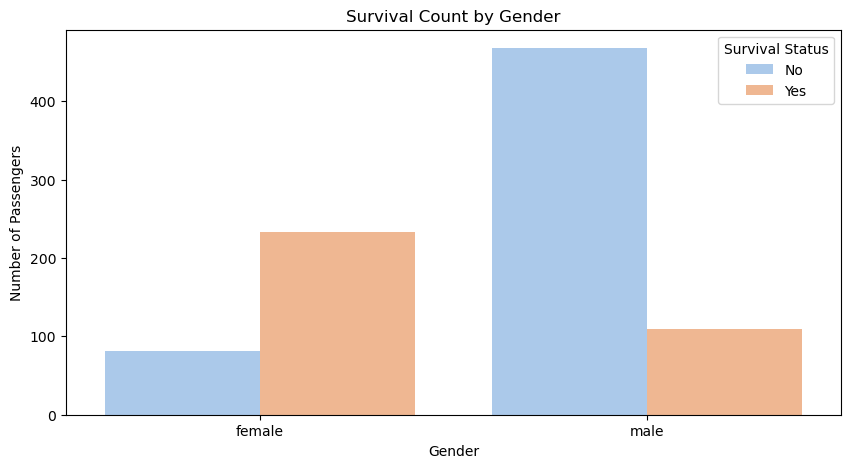

In [11]:
# Counts of Passenger Survied according to the gender

gender_survived = df.groupby(['Survived','Sex']).size().reset_index(name='Count')
print(gender_survived)
ax = sns.barplot(data=gender_survived, x='Sex', y='Count', hue='Survived', palette='pastel')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles,
    ['No', 'Yes'],
    title='Survival Status'
)
plt.show()

Survived      0      1
Embarked              
C          75.0   93.0
Q          47.0   30.0
S         427.0  219.0


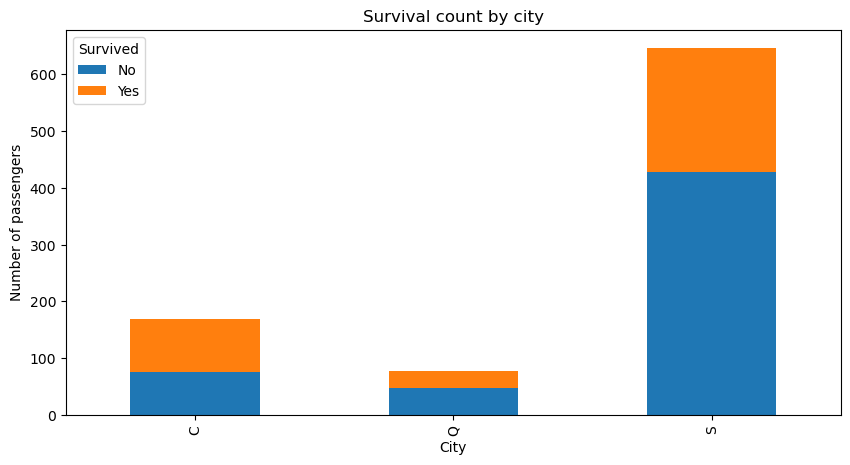

In [12]:
# Count of people survived according to the city
city_survived = df.groupby(['Survived','Embarked']).size().reset_index(name='Count')
temp_df_city = city_survived.pivot_table(index='Embarked',columns='Survived',values='Count')
print(temp_df_city)
ax = temp_df_city.plot(kind='bar',stacked=True)
ax.set_xlabel('City')
ax.set_ylabel('Number of passengers')
ax.set_title('Survival count by city')
plt.legend(title = 'Survived', labels = ['No','Yes'])
plt.show()

In [24]:
df['merged'] = (df['SibSp'] + df['Parch'])
df['merged'] = df['merged'].apply(lambda x: 'Alone' if x == 0 else 'Not Alone')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,merged
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C85,S,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C123,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Not Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,E46,S,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B42,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,C148,S,Not Alone
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Alone


In [39]:
df['Room num'] = df['Cabin'].str.strip().str.extract('(\d+)')
df['Compartment'] = df['Cabin'].str.strip().str.extract("([a-zA-Z]+)", expand=False)
df['Compartment'].value_counts()


Compartment
C    249
B    203
D    155
E    136
A     64
F     63
G     18
T      2
Name: count, dtype: int64

In [41]:
df.drop(['SibSp','Parch','Cabin','Name','Ticket'], axis=1, inplace = True)
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,merged,Room num,Compartment
0,1,0,3,male,22.000000,7.2500,S,Not Alone,85,C
1,2,1,1,female,38.000000,71.2833,C,Not Alone,85,C
2,3,1,3,female,26.000000,7.9250,S,Alone,123,C
3,4,1,1,female,35.000000,53.1000,S,Not Alone,123,C
4,5,0,3,male,35.000000,8.0500,S,Alone,46,E
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,13.0000,S,Alone,42,B
887,888,1,1,female,19.000000,30.0000,S,Alone,42,B
888,889,0,3,female,29.699118,23.4500,S,Not Alone,148,C
889,890,1,1,male,26.000000,30.0000,C,Alone,148,C


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   merged       891 non-null    object 
 8   Room num     874 non-null    object 
 9   Compartment  890 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [70]:
X_train_data = pd.concat([df.iloc[:,0], df.iloc[:,2:]],axis=1)
X_train_data

,PassengerId,Pclass,Sex,Age,Fare,Embarked,merged,Room num,Compartment
0,1,3,male,22.000000,7.2500,S,Not Alone,85,C
1,2,1,female,38.000000,71.2833,C,Not Alone,85,C
2,3,3,female,26.000000,7.9250,S,Alone,123,C
3,4,1,female,35.000000,53.1000,S,Not Alone,123,C
4,5,3,male,35.000000,8.0500,S,Alone,46,E
...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,13.0000,S,Alone,42,B
887,888,1,female,19.000000,30.0000,S,Alone,42,B
888,889,3,female,29.699118,23.4500,S,Not Alone,148,C
889,890,1,male,26.000000,30.0000,C,Alone,148,C
